In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [ ]:
datasetURL = 'https://raw.githubusercontent.com/TylerWanta/NAS100-OCHL-Model/main/NAS100%20Daily%20OHLC.csv?token=GHSAT0AAAAAABV7QLIEBERD56U7LRXYFDLWYVXOSXQ'
df = pd.read_csv(datasetURL)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,10/1/1985,110.620003,112.160004,110.565002,112.139999,112.139999,153160000
1,10/2/1985,112.139999,112.540001,110.779999,110.824997,110.824997,164640000
2,10/3/1985,110.839996,111.184998,110.120003,110.870003,110.870003,147300000
3,10/4/1985,110.870003,110.870003,109.855003,110.074997,110.074997,147900000
4,10/7/1985,110.074997,110.135002,108.175003,108.199997,108.199997,128640000


In [ ]:
df = df.assign(PreviousClose=lambda x: x.Close.shift())
df = df.assign(Increased=lambda x: (x.Close > x.Open).astype(int))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PreviousClose,Increased
0,10/1/1985,110.620003,112.160004,110.565002,112.139999,112.139999,153160000,NaN,1
1,10/2/1985,112.139999,112.540001,110.779999,110.824997,110.824997,164640000,112.139999,0
2,10/3/1985,110.839996,111.184998,110.120003,110.870003,110.870003,147300000,110.824997,1
3,10/4/1985,110.870003,110.870003,109.855003,110.074997,110.074997,147900000,110.870003,0
4,10/7/1985,110.074997,110.135002,108.175003,108.199997,108.199997,128640000,110.074997,0


In [ ]:
x = df[['Open', 'High', 'Low', 'Close', 'PreviousClose']]
y = df[['Increased']]

x = x.iloc[1:, :]
y = y.iloc[1:, :]

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=1)
xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain, test_size=0.25, random_state=2)

In [ ]:
tree = DecisionTreeClassifier(max_depth=10)
tree = tree.fit(xTrain, yTrain)

prediction = tree.predict(xTest)

In [ ]:
train_error = np.round(tree.score(xTrain, yTrain), 2)
test_error = np.round(tree.score(xTest, yTest), 2)

print("Training Set Mean Accuracy = " + str(train_error))
print("Test Set Mean Accuracy = " + str(test_error))

Training Set Mean Accuracy = 0.55
Test Set Mean Accuracy = 0.54


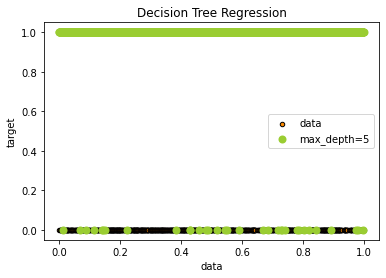

In [ ]:
xPlot = np.linspace(0, 1, xTest.shape[0])
plt.figure()
plt.scatter(xPlot, yTest, s=20, edgecolor="black", c="darkorange", label="data")
plt.scatter(xPlot, prediction, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()